In [1]:
# Add the path of the main directory
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
from nearest_neighbors import NearestNeighbors
from evaluate import Evaluate

Using TensorFlow backend.


In [3]:
%load_ext autoreload

%autoreload 2

In [4]:
# dataDir     = r"C:\Users\Nasser Benab\Documents\git\data\vqa"
# dataDir = r"C:\Users\Nasser Benab\Documents\git\data\vqa"
dataDir = "/home/ubuntu/data/vqa"
versionType = "" 
taskType    = "OpenEnded" 
dataType    = "mscoco"
dataSubTypesTrain = ["train2014"]
dataSubTypeTest = "val2014"

# Training 

In [5]:
near_neighbors = NearestNeighbors(dataDir, versionType, taskType, dataType,
                 dataSubTypesTrain, dataSubTypeTest)

---> train2014
loading VQA annotations and questions into memory...
0:00:10.308712
creating index...
index created!


---> val2014
loading VQA annotations and questions into memory...
0:00:04.082472
creating index...
index created!


---> Loading the skipthoughts model ...


---> Loading the VGG16 model ...


In [6]:
# Encode questions in the training set (skipthoughts)
near_neighbors.encode_questions_train()

The train questions have already been embedded, loading them ...


In [7]:
# Encode questions in the test set (skipthoughts)
near_neighbors.encode_questions_test()

The test questions have already been embedded, loading them ...


In [8]:
near_neighbors.get_test_questions_nn_train_low_memory(chunk_size=5000)

The test questions nearest neighbors in the train set have already been computed, loading ...


In [9]:
near_neighbors.encode_images_train()

  0%|          | 0/82783 [00:00<?, ?it/s]

Encoding train images ...


100%|██████████| 82783/82783 [57:02<00:00, 24.19it/s]


Saving the results ...
Saved file: /home/ubuntu/data/vqa/Embeddings/OpenEnded_mscoco_train2014_vgg_embeddings_nn.pkl


In [10]:
near_neighbors.encode_images_test()

  0%|          | 0/40504 [00:00<?, ?it/s]

Encoding test images ...


100%|██████████| 40504/40504 [28:03<00:00, 24.06it/s]


Saving the results ...
Saved file: /home/ubuntu/data/vqa/Embeddings/OpenEnded_mscoco_val2014_vgg_embeddings_nn.pkl


In [11]:
near_neighbors.get_test_images_nn_train()

Getting the nearest image among the 4 train question/image nearest pairs to each test question/image pair ...


In [26]:
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy.misc import imread
# topImages = near_neighbors.qID_to_img_nn
# train_qID_to_imgID={dic["question_id"]: dic["image_id"] for dic in near_neighbors.questions_train}
# test_qID_to_imgID = {dic["question_id"]: dic["image_id"] for dic in near_neighbors.questions_test}
# qID = np.random.choice(topImages.keys())
# imgID = test_qID_to_imgID[qID]
# topImgID = topImages[qID]
# imgFileName = 'COCO_' + 'val2014' + '_'+ str(imgID).zfill(12) + '.jpg'
# topImgFileName = 'COCO_' + 'train2014' + '_'+ str(topImgID).zfill(12) + '.jpg'

# # plot image from val
# I = imread(os.path.join(dataDir, "Images/mscoco/val2014", imgFileName))
# plt.imshow(I)
# plt.axis('off')
# plt.show()

# # nearest image from train
# I = imread(os.path.join(dataDir, "Images/mscoco/train2014", topImgFileName))
# plt.imshow(I)
# plt.axis('off')
# plt.show()

# Predictions

In [28]:
# Predict answers on the validation dataset
near_neighbors.predict(dataSubTypeTest)

--> Saving the results


# Evaluation 

In [30]:
# Compute the accuracies for the validation set
eval_ = Evaluate(near_neighbors.vqa_test, near_neighbors.results_file, near_neighbors.quesFile_test, near_neighbors.dataDir, 
                 near_neighbors.dataType, dataSubTypeTest)
eval_.compute_accuracies()

Loading and preparing results...     
DONE (t=0.60s)
creating index...
index created!
computing accuracy
Finshed Percent: [####################] 99% Done computing accuracy


Overall Accuracy: 42.52%


In [31]:
# Accuracy per answer type (%)
eval_.acc_answer_type_df

,Answer type,Accuracy
0,yes/no,73.58
1,number,24.35
2,other,23.83


In [32]:
# Accuracy per question type (%)
eval_.acc_question_type_df.head()

,Question type,Accuracy
0,is there a,81.67
1,is there,77.76
2,do you,77.46
3,could,76.65
4,are there,75.15


Ground truth answers:
---------------------
Question: Could more than one person sleep on this bed?
Answer 1: no
Answer 2: yes
Answer 3: no
Answer 4: yes
Answer 5: yes
Answer 6: no
Answer 7: yes
Answer 8: no
Answer 9: no
Answer 10: yes


Generated answer (accuracy 100.0%):
---------------------------------
Answer: yes


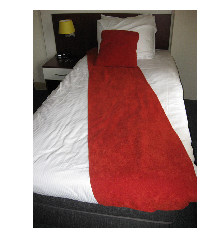

In [33]:
# Retrieve particular results
eval_.retrieve_result(question_type="could")